# Lab #3: Asking a statistical question

## Problem 1

In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

To make this a bit concrete, we will simulate a little data. Start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}

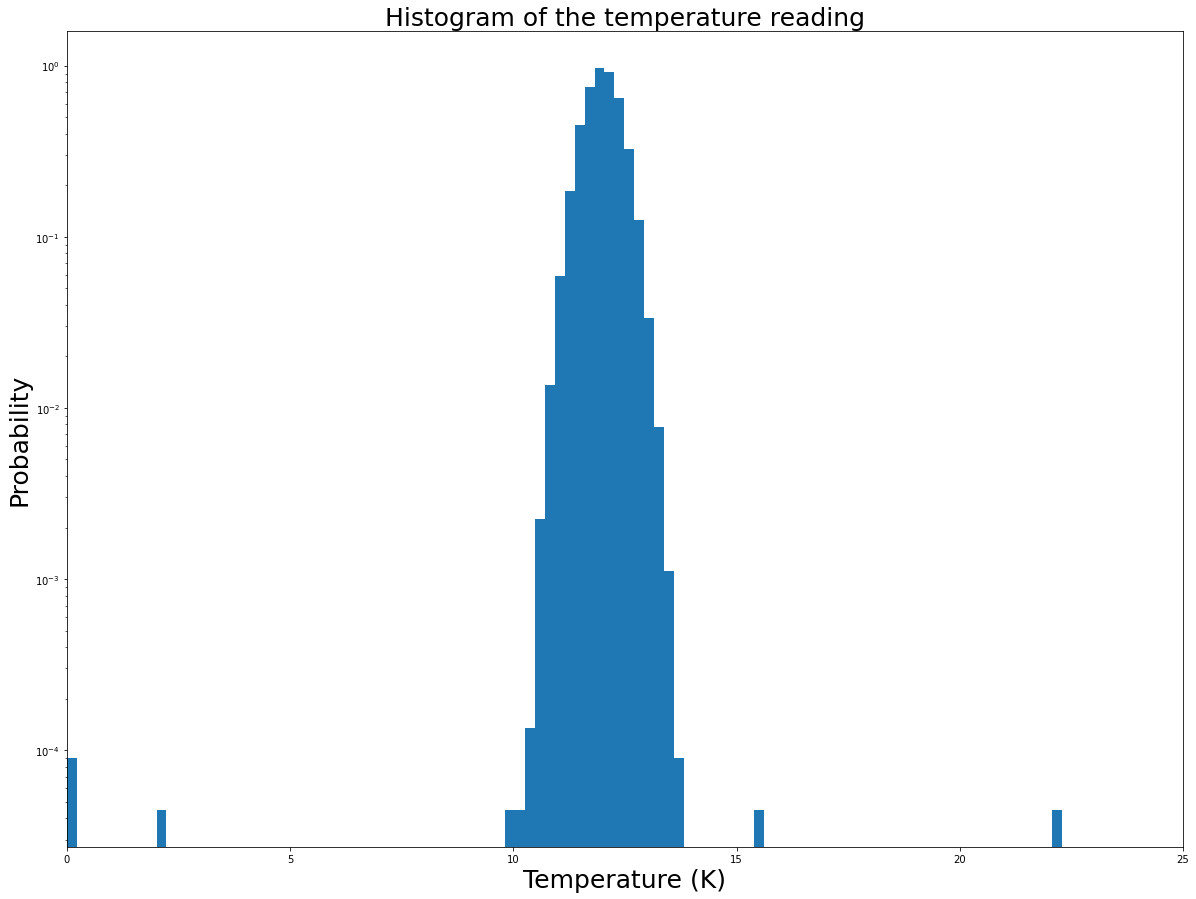

In [16]:
dist=stats.norm(12,0.4)
good=dist.rvs(100000)
bad=np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
data=np.append(good,bad)
ax=plt.hist(data,density=True,bins=100)
plt.xlim([0,25])
plt.xlabel('Temperature (K)', size=25)
plt.ylabel('Probability',size=25)
plt.title('Histogram of the temperature reading',size=25)
plt.yscale('log')
plt.show()

A) 1. We know that there is 100000 good data, and 8 bad data. Now testing our data count with different sigma:

In [17]:
mean=12
sigma=1
lowbnd=mean-sigma*0.4
upbnd=mean+sigma*0.4
good_count=0
for i in data:
    if (i >=lowbnd) & (i<=upbnd):
        good_count=good_count+1;
bad_count=len(data)-good_count
print('Your test good: ', good_count)
print('Your test bad: ',bad_count)

Your test good:  68098
Your test bad:  31910


In [18]:
sigma=2
lowbnd=mean-sigma*0.4
upbnd=mean+sigma*0.4
good_count=0
for i in data:
    if (i >=lowbnd) & (i<=upbnd):
        good_count=good_count+1;
bad_count=len(data)-good_count
print('Your test good: ', good_count)
print('Your test bad: ',bad_count)

Your test good:  95497
Your test bad:  4511


In [19]:
sigma=3
lowbnd=mean-sigma*0.4
upbnd=mean+sigma*0.4
good_count=0
for i in data:
    if (i >=lowbnd) & (i<=upbnd):
        good_count=good_count+1;
bad_count=len(data)-good_count
print('Your test good: ', good_count)
print('Your test bad: ',bad_count)

Your test good:  99740
Your test bad:  268


In [20]:
sigma=6
lowbnd=mean-sigma*0.4
upbnd=mean+sigma*0.4
good_count=0
for i in data:
    if (i >=lowbnd) & (i<=upbnd):
        good_count=good_count+1;
bad_count=len(data)-good_count
print('Your test good: ', good_count)
print('Your test bad: ',bad_count)

Your test good:  100003
Your test bad:  5


We can see that as we increases sigma, we get more good data but there's also more chance that we get we mistake bad data as good data.

2.We can ask a statistical question: With 4 sigma from the mean, What is the probability that the data we throw are actually True good data? So, to answer this, We need to count all data that is from 10.4 Kelvin to 13.6 Kelvin and throw all other data out. Then use the true bad data to calculate the mistake that we makes.

3.Restate your question in math: let x is the true good data, then the statistical question in math will be P(x<10.4 or x>13.6)?

4.Apply your statistical test and construct a truth table:

In [23]:
sigma=4
lowbnd=mean-sigma*0.4
upbnd=mean+sigma*0.4
good_count=0
for i in data:
    if (i >=lowbnd) & (i<=upbnd):
        good_count=good_count+1;
bad_count=len(data)-good_count
print('Your test good: ', good_count)
print('Your test bad: ',bad_count)

Your test good:  99997
Your test bad:  11


||True Good|True Bad|
|---|---|---|
|Your test good|99997|0|
|Your test bad|3|8|

so there is $\frac{3}{11}=27$% that we threw out good data.

B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

The number of omissions decrease as I increases the threshold because the range we set to be good data get wider, so more data will getting in that range, therefore less chance of throwing out good data, but more chance bad data will getting in. It is not a predictable quantity.

C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

Yes, there are mistakes of commission. They are unavoiable. If we increase the threshold, the mistake of commission increase. 

## Problem 2

In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

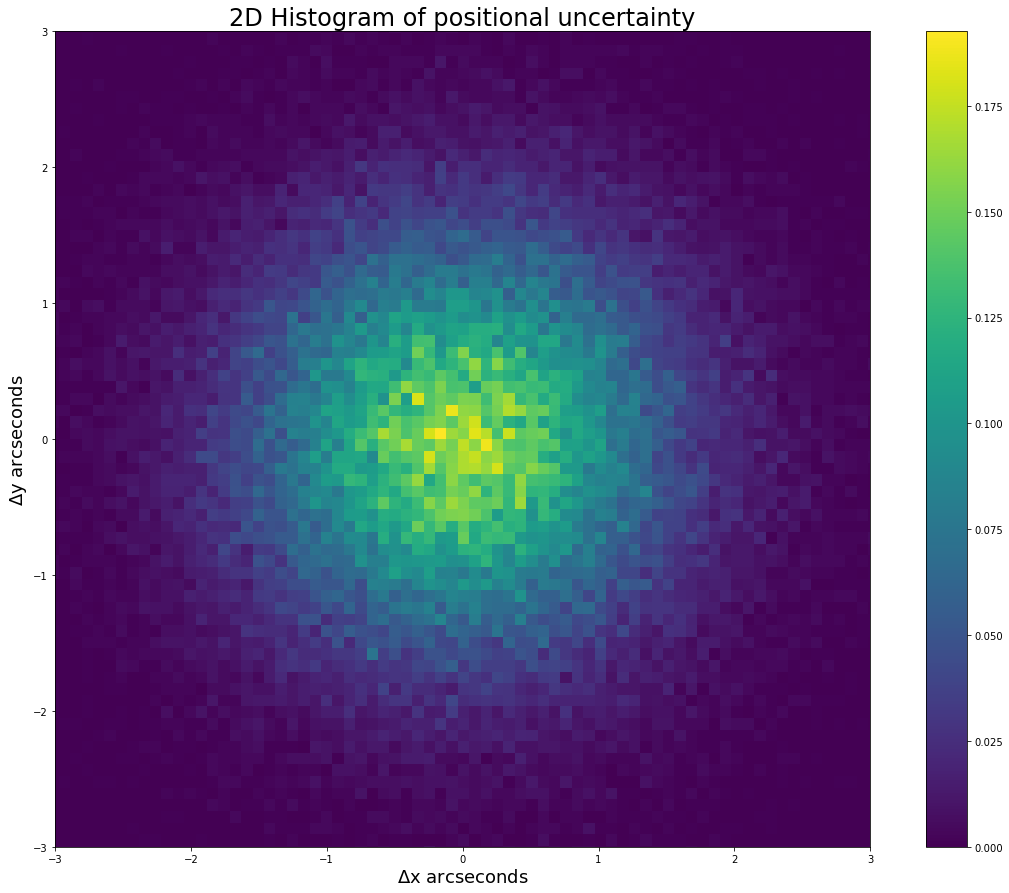

In [26]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

1.With a 5 sigma detection of movement, what is the minimum distance in arcsecond that can be consider an asteroid movement? 

2.The question in math: What is the distance away from the origin in the 2D Gaussian with 1 arcsecond might give a significance position of 5 sigma?

3.The pdf of the 2D Gaussian distribution is Rayleigh distribution. So we can calculate the distance in arcseconds represents a 5 sigma detection of motion:

In [31]:
prob=stats.norm.cdf(5)
distance=stats.rayleigh.ppf(prob)
print('the distance for 5 sigma is ', distance, 'arcseconds')

the distance for 5 sigma is  5.489079776034238 arcseconds


## Problem 3

As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

From lab 2, we know that the background of cosmic ray provides a discrete noise term across the sky that precisely follows a Poisson distribution.
We normally have a cosmic ray rate of 1 cosmic ray per minute, to the average cosmic rays we observe for 8 hours per night for 15 days is $1*60*8*15=7200$ cosmic rays. The probability distribution of the background:

(1e-10, 0.011220184543019636)

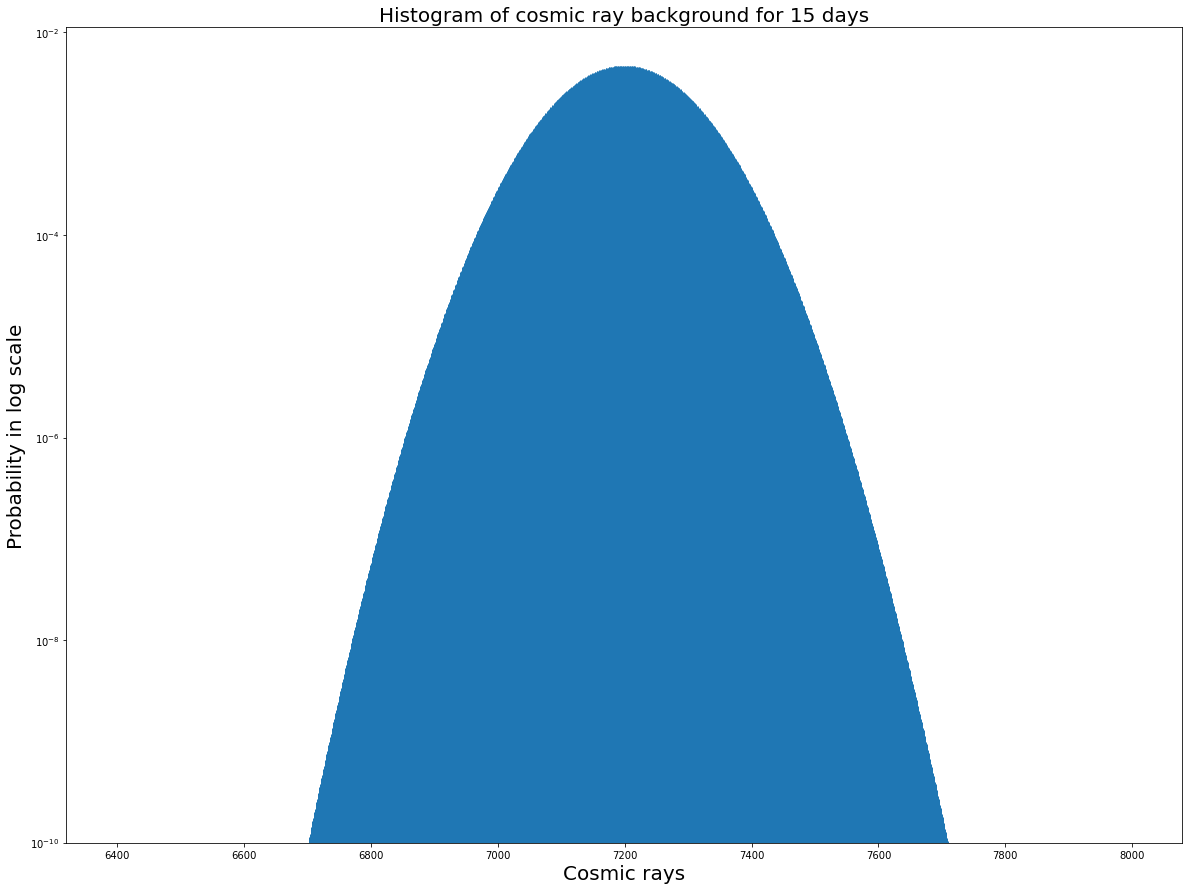

In [43]:
dist = stats.poisson(7200)
x = np.arange(6400, 8000)
prob = dist.pmf(x)
plt.vlines(x, 0, prob, linewidth=1, color="C0")
plt.title("Histogram of cosmic ray background for 15 days",size=20)
plt.xlabel("Cosmic rays",size=20)
plt.ylabel("Probability in log scale",size=20)
plt.yscale('log')
plt.ylim(1e-10,None)

1.Statistical question: what is the probability that in 15 days we observe 6800 or less cosmic rays because of the sun and the moon block some of the cosmic rays?

2.Translate the question to math: let x is the number of cosmic rays observed, so the question is to calculate $P(x\leqslant6800)$?

Our Poisson distribution on the log scale look like a Gaussian distribution. This make sense because summing Poisson distributions, it will approach Gaussian. To find $P(x\leqslant6800)$ we and integrate the background distribution above from 0 to 6800.

In [46]:
prob = dist.cdf(6800)
print('The probability is',prob)

The probability is 1.0133280183917768e-06


3.To find the signficance of our moon shadow detection, we converted the probability to sigma

In [45]:
sigma=stats.norm.ppf(prob)
print('The significance of our moon shadow detection is:', sigma)

The significance of our moon shadow detection is: -4.750747965777188
